In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu,floatX=float32"
import theano
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.optimizers import *
from keras.utils.np_utils import *
from keras.regularizers import l2, activity_l2

from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [7]:
X_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_train.npy')
X_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_test.npy')
y_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_train.npy')
y_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_test.npy')

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_train[0])

In [8]:
# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image


print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (mean_image)
print (X_train[0])

In [5]:
X_train /= np.std(X_train, axis = 0) # normalize
X_test /= np.std(X_test, axis = 0) # normalize



print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (mean_image)
print (X_train[0])

In [9]:
print (X_train[0])

[[[ -71.71074  -74.05614  -69.5538 ]
  [ -87.14036  -89.44238  -86.85358]
  [ -81.05044  -88.24616  -89.58144]
  ..., 
  [  26.94098   -4.307    -24.44078]
  [  21.60692  -10.70848  -30.00036]
  [  17.826    -11.4736   -28.89246]]

 [[-114.0993  -115.29484 -111.36412]
  [-129.3446  -134.45914 -130.4656 ]
  [-112.2169  -127.1767  -131.10234]
  ..., 
  [  -7.04254  -47.13862  -75.90018]
  [ -10.33038  -51.55898  -80.49918]
  [  -7.1568   -47.38368  -73.45104]]

 [[-104.72472 -110.64818 -109.2514 ]
  [-112.71662 -126.49748 -129.01922]
  [ -80.47348 -107.05546 -121.47586]
  ..., 
  [ -11.21066  -49.95824  -79.29398]
  [  -8.59094  -49.54152  -79.06528]
  [ -19.59134  -60.55772  -87.22356]]

 ..., 
 [[  81.44628   44.0467   -18.1421 ]
  [  76.41156   29.2665   -77.77894]
  [  74.07492   38.1989   -84.73544]
  ..., 
  [  35.75964    9.99658  -40.87088]
  [ -68.68902  -92.7463  -104.75116]
  [ -72.51674  -90.86008  -93.10554]]

 [[  52.9319    12.62384  -18.64896]
  [  47.53098   -1.58318  -7

In [10]:
#x_train = X_train.astype('float32') / 255.
#x_test = X_test.astype('float32') / 255.
x_train = X_train.astype('float32') / 1.
x_test = X_test.astype('float32') / 1.
print (x_train[0])
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

[[[ -71.71073914  -74.05613708  -69.55380249]
  [ -87.14035797  -89.44238281  -86.85357666]
  [ -81.05043793  -88.24616241  -89.58144379]
  ..., 
  [  26.94098091   -4.30700016  -24.44078064]
  [  21.60692024  -10.70847988  -30.00036049]
  [  17.82600021  -11.47360039  -28.89245987]]

 [[-114.09929657 -115.29483795 -111.36412048]
  [-129.34460449 -134.45913696 -130.46560669]
  [-112.21690369 -127.17669678 -131.1023407 ]
  ..., 
  [  -7.04254007  -47.13861847  -75.900177  ]
  [ -10.33038044  -51.55897903  -80.49918365]
  [  -7.15679979  -47.38367844  -73.45104218]]

 [[-104.72471619 -110.6481781  -109.25140381]
  [-112.7166214  -126.4974823  -129.01922607]
  [ -80.47348022 -107.05545807 -121.4758606 ]
  ..., 
  [ -11.21065998  -49.95824051  -79.29398346]
  [  -8.59094048  -49.54151917  -79.0652771 ]
  [ -19.59133911  -60.55772018  -87.22355652]]

 ..., 
 [[  81.44628143   44.04669952  -18.14209938]
  [  76.41156006   29.26650047  -77.77893829]
  [  74.07492065   38.19889832  -84.7354431

In [11]:
s_train, s_valid = train_test_split(x_train, test_size=0.1)
print (s_train.shape)
print (s_valid.shape)

(45000, 3072)
(5000, 3072)


In [12]:
label_train, label_valid = train_test_split(y_train, test_size=0.1)
print (label_train.shape)
print (label_valid.shape)

label_train=to_categorical(label_train)
label_valid=to_categorical(label_valid)

print (label_train.shape)
print (label_valid.shape)
print (label_train)

(45000,)
(5000,)
(45000, 10)
(5000, 10)
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]


In [10]:
from keras import backend as K
import numpy as np

def my_init(shape, name=None):
    value = np.random.random(shape)
    print (value.shape)
    return K.variable(value, name=name)

#model.add(Dense(64, init=my_init))

In [11]:
my_init(100)


(100,)


<CudaNdarrayType(float32, vector)>

In [19]:
model = Sequential()
model.add(Dense(50, input_dim=3072,W_regularizer=l2(0.9),init='glorot_uniform', activation='relu'))
#model.add(Dense(50,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(10,W_regularizer=l2(0.9),init='glorot_uniform',activation='softmax'))

In [20]:
#autoencoder.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy') #around 35.47% test accuracy
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #around 40% test accuracy
#model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy
#model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy
#model.compile(optimizer=SGD(lr=0.00001,decay=0.95,momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy
#model.compile(optimizer=SGD(lr=0.00001, momentum=0.0, decay=0.0, nesterov=False), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy

In [21]:
history=model.fit(s_train, label_train,
                nb_epoch=60,
                batch_size=250,
                shuffle=True,
                validation_data=(s_valid, label_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/60
45000/45000 [==============================] - 1s - loss: 99.3109 - acc: 0.0990 - val_loss: 14.1679 - val_acc: 0.0950
Epoch 2/60
45000/45000 [==============================] - 1s - loss: 69.9906 - acc: 0.1035 - val_loss: 14.0452 - val_acc: 0.0972
Epoch 3/60
45000/45000 [==============================] - 1s - loss: 51.6123 - acc: 0.1040 - val_loss: 10.0848 - val_acc: 0.0922
Epoch 4/60
45000/45000 [==============================] - 1s - loss: 36.0937 - acc: 0.1070 - val_loss: 8.4243 - val_acc: 0.1000
Epoch 5/60
45000/45000 [==============================] - 1s - loss: 28.0916 - acc: 0.1082 - val_loss: 8.0840 - val_acc: 0.1014
Epoch 6/60
45000/45000 [==============================] - 1s - loss: 22.9222 - acc: 0.1079 - val_loss: 7.9472 - val_acc: 0.0980
Epoch 7/60
45000/45000 [==============================] - 1s - loss: 19.4577 - acc: 0.1084 - val_loss: 7.8490 - val_acc: 0.0964
Epoch 8/60
45000/45000 [============================

print (history.history)

0.152511111399


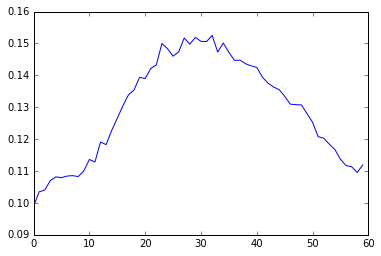

In [22]:

plt.plot(history.history['acc'])
print(max(history.history['acc']))

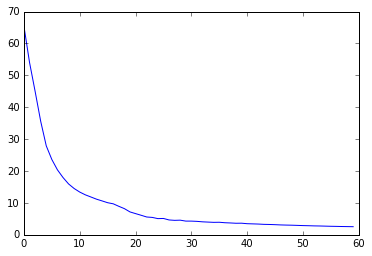

In [17]:
plt.plot(history.history['loss'])


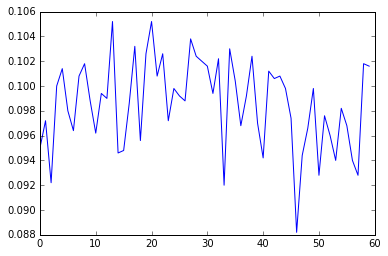

In [23]:
plt.plot(history.history['val_acc'])

In [15]:
test_acc = model.predict_classes(x_test) 
print ('Test accuracy: ', test_acc)
print (test_acc.shape)
# round predictions
#rounded = [round(x) for x in test_acc]
#rounded = np.round(test_acc)
#print(rounded[1])

/home/mrafi123/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


 9696/10000 [============================>.] - ETA: 0sTest accuracy:  [7 7 6 ..., 4 8 1]
(10000,)


In [16]:
print (y_test.shape)
#y_test=to_categorical(y_test)
print (y_test.shape)

(10000,)
(10000,)


In [17]:
num=len(x_test)
r=0
w=0
for i in range(num):
        #print ('y_pred ',test_acc[i])
        #print ('labels ',y_test[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(test_acc[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  1029 wrong:  8971 error rate:  89.71 %
got correctly  10.29 %
